In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')
test_data=pd.read_csv('/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv')
print(data.shape,test_data.shape)

(614, 13) (367, 12)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# **Data Preprocessing**

In [57]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [9]:
data=data.drop(['Loan_ID'],axis=1)
test_data=test_data.drop(['Loan_ID'],axis=1)
print(data.columns,test_data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [10]:
data['Credit_History'].replace(1.0,'1',inplace=True)
data['Credit_History'].replace(0.0,'0',inplace=True)
test_data['Credit_History'].replace(1.0,'1',inplace=True)
test_data['Credit_History'].replace(0.0,'0',inplace=True)

In [11]:
data['Loan_Status'].replace('Y',1,inplace=True)
data['Loan_Status'].replace('N',0,inplace=True)
print(data['Loan_Status'].unique())

[1 0]


In [12]:
class DataPreprocess():
    
    def fit(self,data):
        
        self.PreprocessValues={}
        
        for col in data.columns:
            
            if(data[col].dtype==np.object):
                
                self.PreprocessValues[col]=col+'_UNK'
            else:
                
                self.PreprocessValues[col]=data[col].median()
    
    def transform(self,data):
        
        
        for col in data.columns:
            
            data[col].replace(np.NaN,self.PreprocessValues[col],inplace=True)
        
        return data

In [13]:
Preprocess=DataPreprocess()

Preprocess.fit(data)
PreprocessedTrainData=Preprocess.transform(data)
PreprocessedTestData=Preprocess.transform(test_data)
PreprocessedTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [14]:
PreprocessedTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    object 
 10  Property_Area      367 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 31.7+ KB


In [15]:
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term',]:
    
    min_val=PreprocessedTrainData[col].min()
    max_val=PreprocessedTrainData[col].max()
    PreprocessedTrainData[col]=(PreprocessedTrainData[col]-min_val)/(max_val-min_val)
    PreprocessedTestData[col]=(PreprocessedTestData[col]-min_val)/(max_val-min_val)
    
PreprocessedTrainData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,0.74359,1,Urban,1
1,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,0.74359,1,Rural,0
2,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,0.74359,1,Urban,1
3,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,0.74359,1,Urban,1
4,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,0.74359,1,Urban,1


In [16]:
PreprocessedTestData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,0.068893,0.000000,0.146165,0.74359,1,Urban
1,Male,Yes,1,Graduate,No,0.036190,0.036000,0.169320,0.74359,1,Urban
2,Male,Yes,2,Graduate,No,0.059988,0.043200,0.287988,0.74359,1,Urban
3,Male,Yes,2,Graduate,No,0.027087,0.061104,0.131693,0.74359,Credit_History_UNK,Urban
4,Male,No,0,Not Graduate,No,0.038664,0.000000,0.099855,0.74359,1,Urban


In [17]:
Encode=OneHotEncoder(sparse=False)
Encode.fit(PreprocessedTrainData[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']])

OneHotEncoder(sparse=False)

In [18]:
EncodedCategories=[j for i in Encode.categories_ for j in i]
print(EncodedCategories)

['Female', 'Gender_UNK', 'Male', 'Married_UNK', 'No', 'Yes', '0', '1', '2', '3+', 'Dependents_UNK', 'Graduate', 'Not Graduate', 'No', 'Self_Employed_UNK', 'Yes', 'Rural', 'Semiurban', 'Urban', '0', '1', 'Credit_History_UNK']


In [19]:
EncodedTrainData=Encode.transform(PreprocessedTrainData[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']])
EncodedTestData=Encode.transform(PreprocessedTestData[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area','Credit_History']])

In [20]:
X=pd.concat([pd.DataFrame(EncodedTrainData,columns=EncodedCategories),PreprocessedTrainData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Loan_Status']]],axis=1)

X_test=pd.concat([pd.DataFrame(EncodedTestData,columns=EncodedCategories),PreprocessedTestData[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]],axis=1)
X.head()

,Female,Gender_UNK,Male,Married_UNK,No,Yes,0,1,2,3+,...,Semiurban,Urban,0,1,Credit_History_UNK,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.070489,0.000000,0.172214,0.74359,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.054830,0.036192,0.172214,0.74359,0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.035250,0.000000,0.082489,0.74359,1
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Female              614 non-null    float64
 1   Gender_UNK          614 non-null    float64
 2   Male                614 non-null    float64
 3   Married_UNK         614 non-null    float64
 4   No                  614 non-null    float64
 5   Yes                 614 non-null    float64
 6   0                   614 non-null    float64
 7   1                   614 non-null    float64
 8   2                   614 non-null    float64
 9   3+                  614 non-null    float64
 10  Dependents_UNK      614 non-null    float64
 11  Graduate            614 non-null    float64
 12  Not Graduate        614 non-null    float64
 13  No                  614 non-null    float64
 14  Self_Employed_UNK   614 non-null    float64
 15  Yes                 614 non-null    float64
 16  Rural   

In [22]:
X_test.head()

,Female,Gender_UNK,Male,Married_UNK,No,Yes,0,1,2,3+,...,Rural,Semiurban,Urban,0,1,Credit_History_UNK,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.068893,0.000000,0.146165,0.74359
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.036190,0.036000,0.169320,0.74359
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.059988,0.043200,0.287988,0.74359
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.027087,0.061104,0.131693,0.74359
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.038664,0.000000,0.099855,0.74359


In [23]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Female              367 non-null    float64
 1   Gender_UNK          367 non-null    float64
 2   Male                367 non-null    float64
 3   Married_UNK         367 non-null    float64
 4   No                  367 non-null    float64
 5   Yes                 367 non-null    float64
 6   0                   367 non-null    float64
 7   1                   367 non-null    float64
 8   2                   367 non-null    float64
 9   3+                  367 non-null    float64
 10  Dependents_UNK      367 non-null    float64
 11  Graduate            367 non-null    float64
 12  Not Graduate        367 non-null    float64
 13  No                  367 non-null    float64
 14  Self_Employed_UNK   367 non-null    float64
 15  Yes                 367 non-null    float64
 16  Rural   

In [24]:
Y=X['Loan_Status']
X.drop('Loan_Status',inplace=True,axis=1)

print(X.shape,Y.shape)

(614, 26) (614,)


# **Models**

In [33]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [26]:
# X_train,X_val,Y_train,Y_val=train_test_split(X,list(Y),test_size=0.3,train_size=0.7,shuffle=True,random_state=29)
# print(len(X_train),len(Y_train))
# print(len(X_val),len(Y_val))

# **Logistic Regression**

In [45]:
model=SGDClassifier(random_state=29)

param_grid={
    
            'eta0' : [0.0001,0.001,0.01,0.1,1],
            'alpha' : [0.0001,0.001,0.1]
}

cv=GridSearchCV(model,param_grid=param_grid)

cv.fit(X,list(Y))

GridSearchCV(estimator=SGDClassifier(random_state=29),
             param_grid={'alpha': [0.0001, 0.001, 0.1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1]})

In [46]:
cv.best_estimator_

SGDClassifier(alpha=0.001, eta0=0.0001, random_state=29)

In [47]:
cv.best_params_

{'alpha': 0.001, 'eta0': 0.0001}

In [48]:
cv.best_score_

0.809462881514061

In [49]:
model=SGDClassifier(alpha=0.001,eta0=0.0001,random_state=29)
model.fit(X,list(Y))

SGDClassifier(alpha=0.001, eta0=0.0001, random_state=29)

In [50]:
pd.DataFrame(model.predict(X_test),columns=['Loan_Status']).to_csv('/kaggle/working/output.csv')

# **SVC**

In [53]:
model=SVC(random_state=29)

cv=GridSearchCV(model,param_grid={'C' : [0.0001,0.001,0.01,0.1,1,10,100,1000]})

cv.fit(X,list(Y))


GridSearchCV(estimator=SVC(random_state=29),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [54]:
cv.best_params_

{'C': 1}

In [55]:
cv.best_score_

0.809462881514061

In [56]:
model=SVC(C=1,random_state=29)
model.fit(X,list(Y))
model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

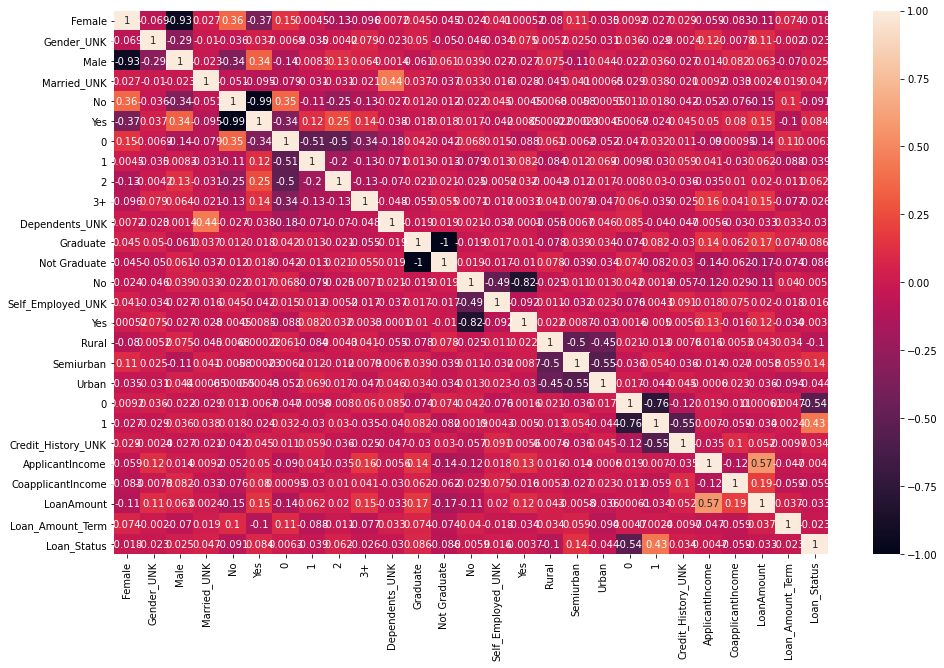

In [64]:
corr_data=pd.concat([X,Y],axis=1).corr()
plt.figure(figsize=(22,10))
sns.heatmap(corr_data,annot=True)